In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!nvidia-smi #Checking the NVIDIA - System Management Interface

Sun Mar 10 05:39:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import os
os.getcwd()
#we will create a new folder
HOME  = os.getcwd() + '/yolo'
HOME

'/kaggle/working/yolo'

In [4]:
#now we use makedirs from os module
os.makedirs(HOME,exist_ok = True)

In [5]:
!pip install ultralytics==8.0.196

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 5.0 MB/s eta 0:00:00a 0:00:01


In [6]:
#Let us have Ultralytics checks
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5518.9/8062.4 GB disk)


In [8]:
#we will import IPython to display and clear the output
from IPython import display
display.clear_output()

In [9]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 852.1 kB/s eta 0:00:000:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 2.5 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 30.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: certifi
    Found existing instal

In [10]:
from roboflow import Roboflow
rf = Roboflow(api_key="Z3iAvLZOkxqM7Hf9D3Ch")
project = rf.workspace("testing-ntfyz").project("brain_tumour-sfzuc")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Brain_Tumour-3 in yolov8:: 100%|██████████| 10128/10128 [00:00<00:00, 10388.33it/s]


In [11]:
#We will create a new folder to get the dataset saved
!mkdir {HOME}/datasets

In [12]:
!cd {HOME}/datasets

In [14]:
!yolo task=detect mode=train model=yolov8l.pt data={dataset.location}/data.yaml epochs=50 patience=50 imgsz=640 plots=True project={HOME}/runs/detect

100%|███████████████████████████████████████| 83.7M/83.7M [00:00<00:00, 271MB/s]
New https://pypi.org/project/ultralytics/8.1.25 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/kaggle/working/Brain_Tumour-3/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/kaggle/working/yolo/runs/detect, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show

In [16]:
#It gives the list of all files created during training YOLO Model
!ls {HOME}/runs/detect/train2

F1_curve.png					   train_batch1.jpg
PR_curve.png					   train_batch11280.jpg
P_curve.png					   train_batch11281.jpg
R_curve.png					   train_batch11282.jpg
args.yaml					   train_batch2.jpg
confusion_matrix.png				   val_batch0_labels.jpg
confusion_matrix_normalized.png			   val_batch0_pred.jpg
events.out.tfevents.1710049746.f9710754f5ab.263.0  val_batch1_labels.jpg
labels.jpg					   val_batch1_pred.jpg
labels_correlogram.jpg				   val_batch2_labels.jpg
results.csv					   val_batch2_pred.jpg
results.png					   weights
train_batch0.jpg


In [17]:
from IPython.display import display,Image

In [18]:
%cd {HOME}

/kaggle/working/yolo


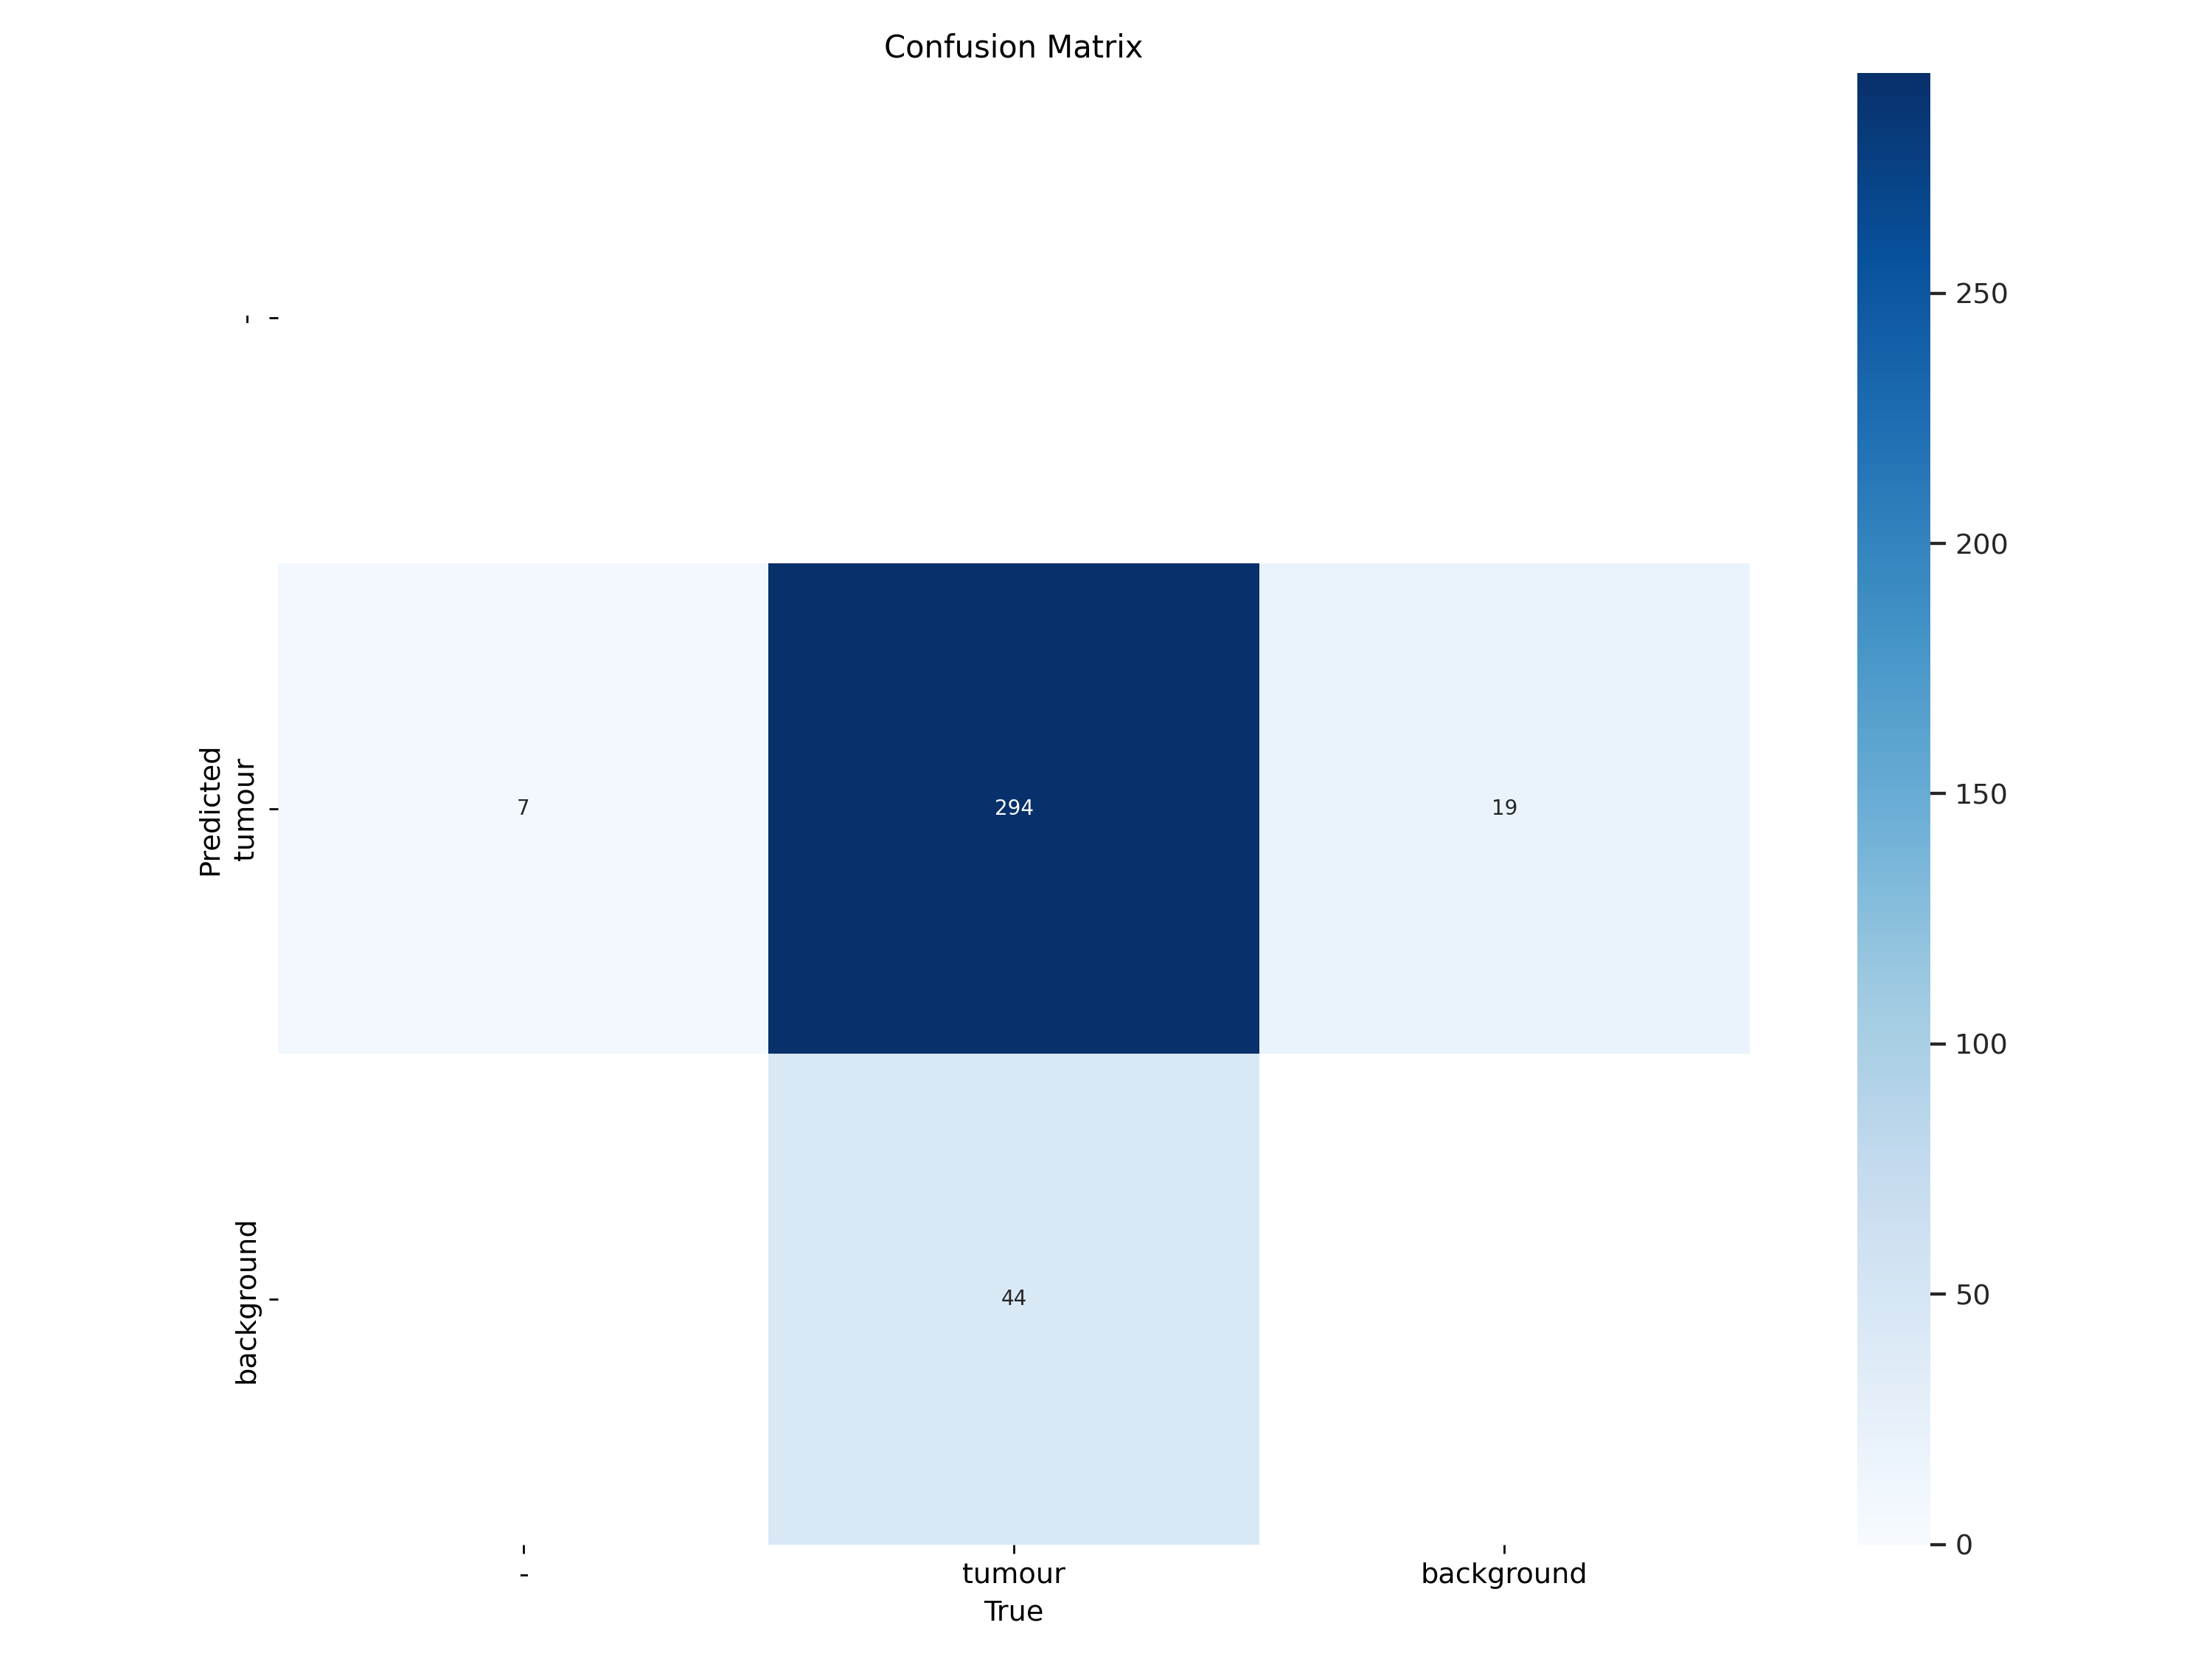

In [19]:
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png',
      width=600)

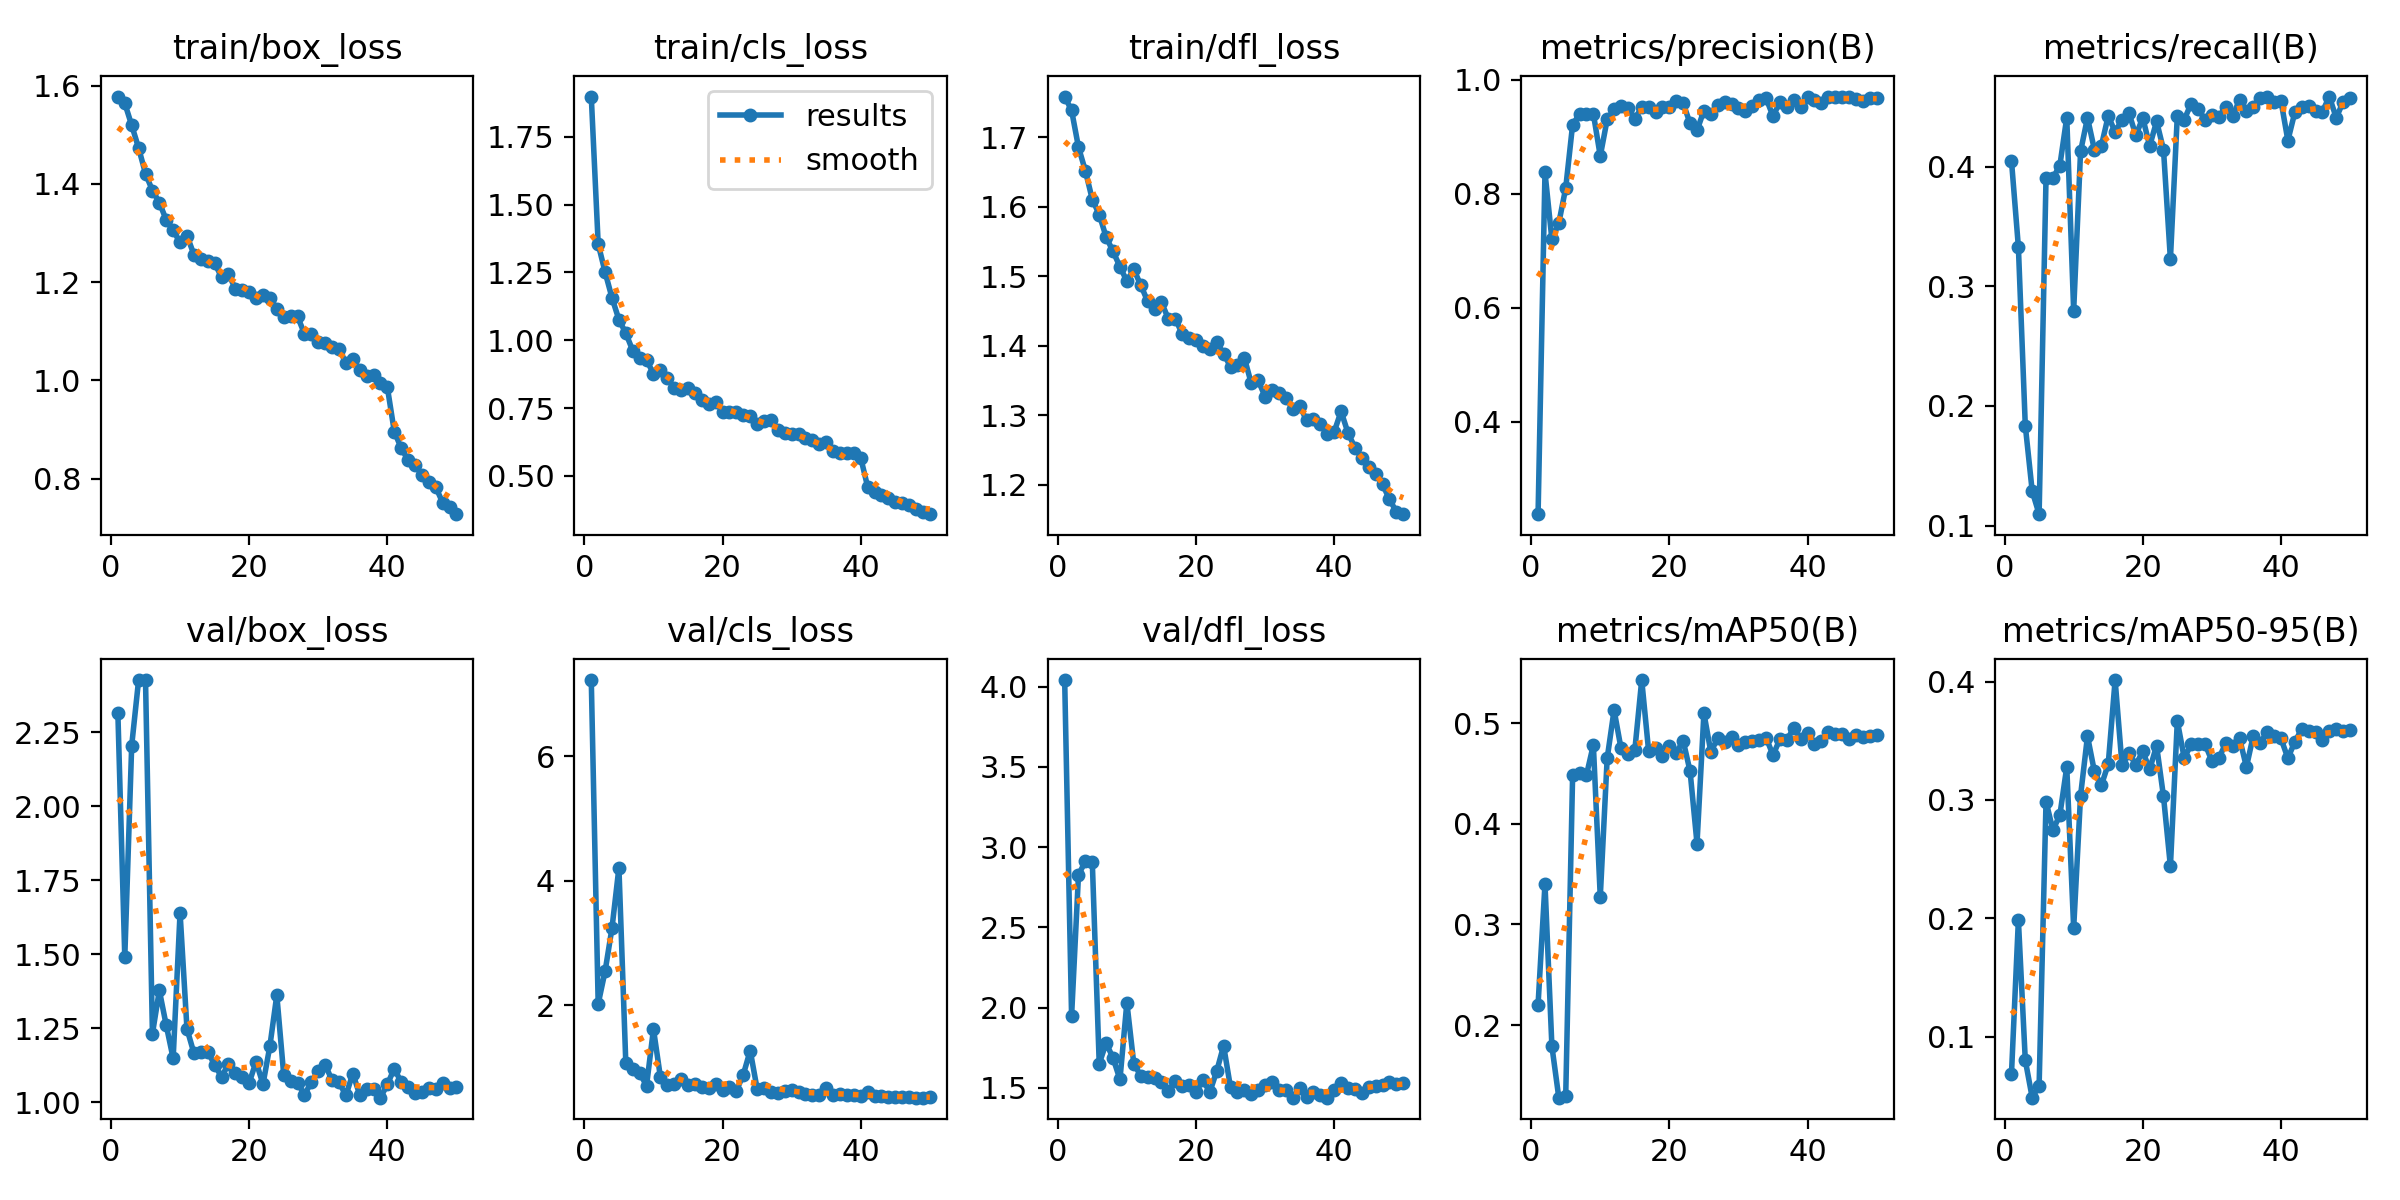

In [20]:
Image(filename=f'{HOME}/runs/detect/train2/results.png',
      width=600)

/kaggle/working/yolo


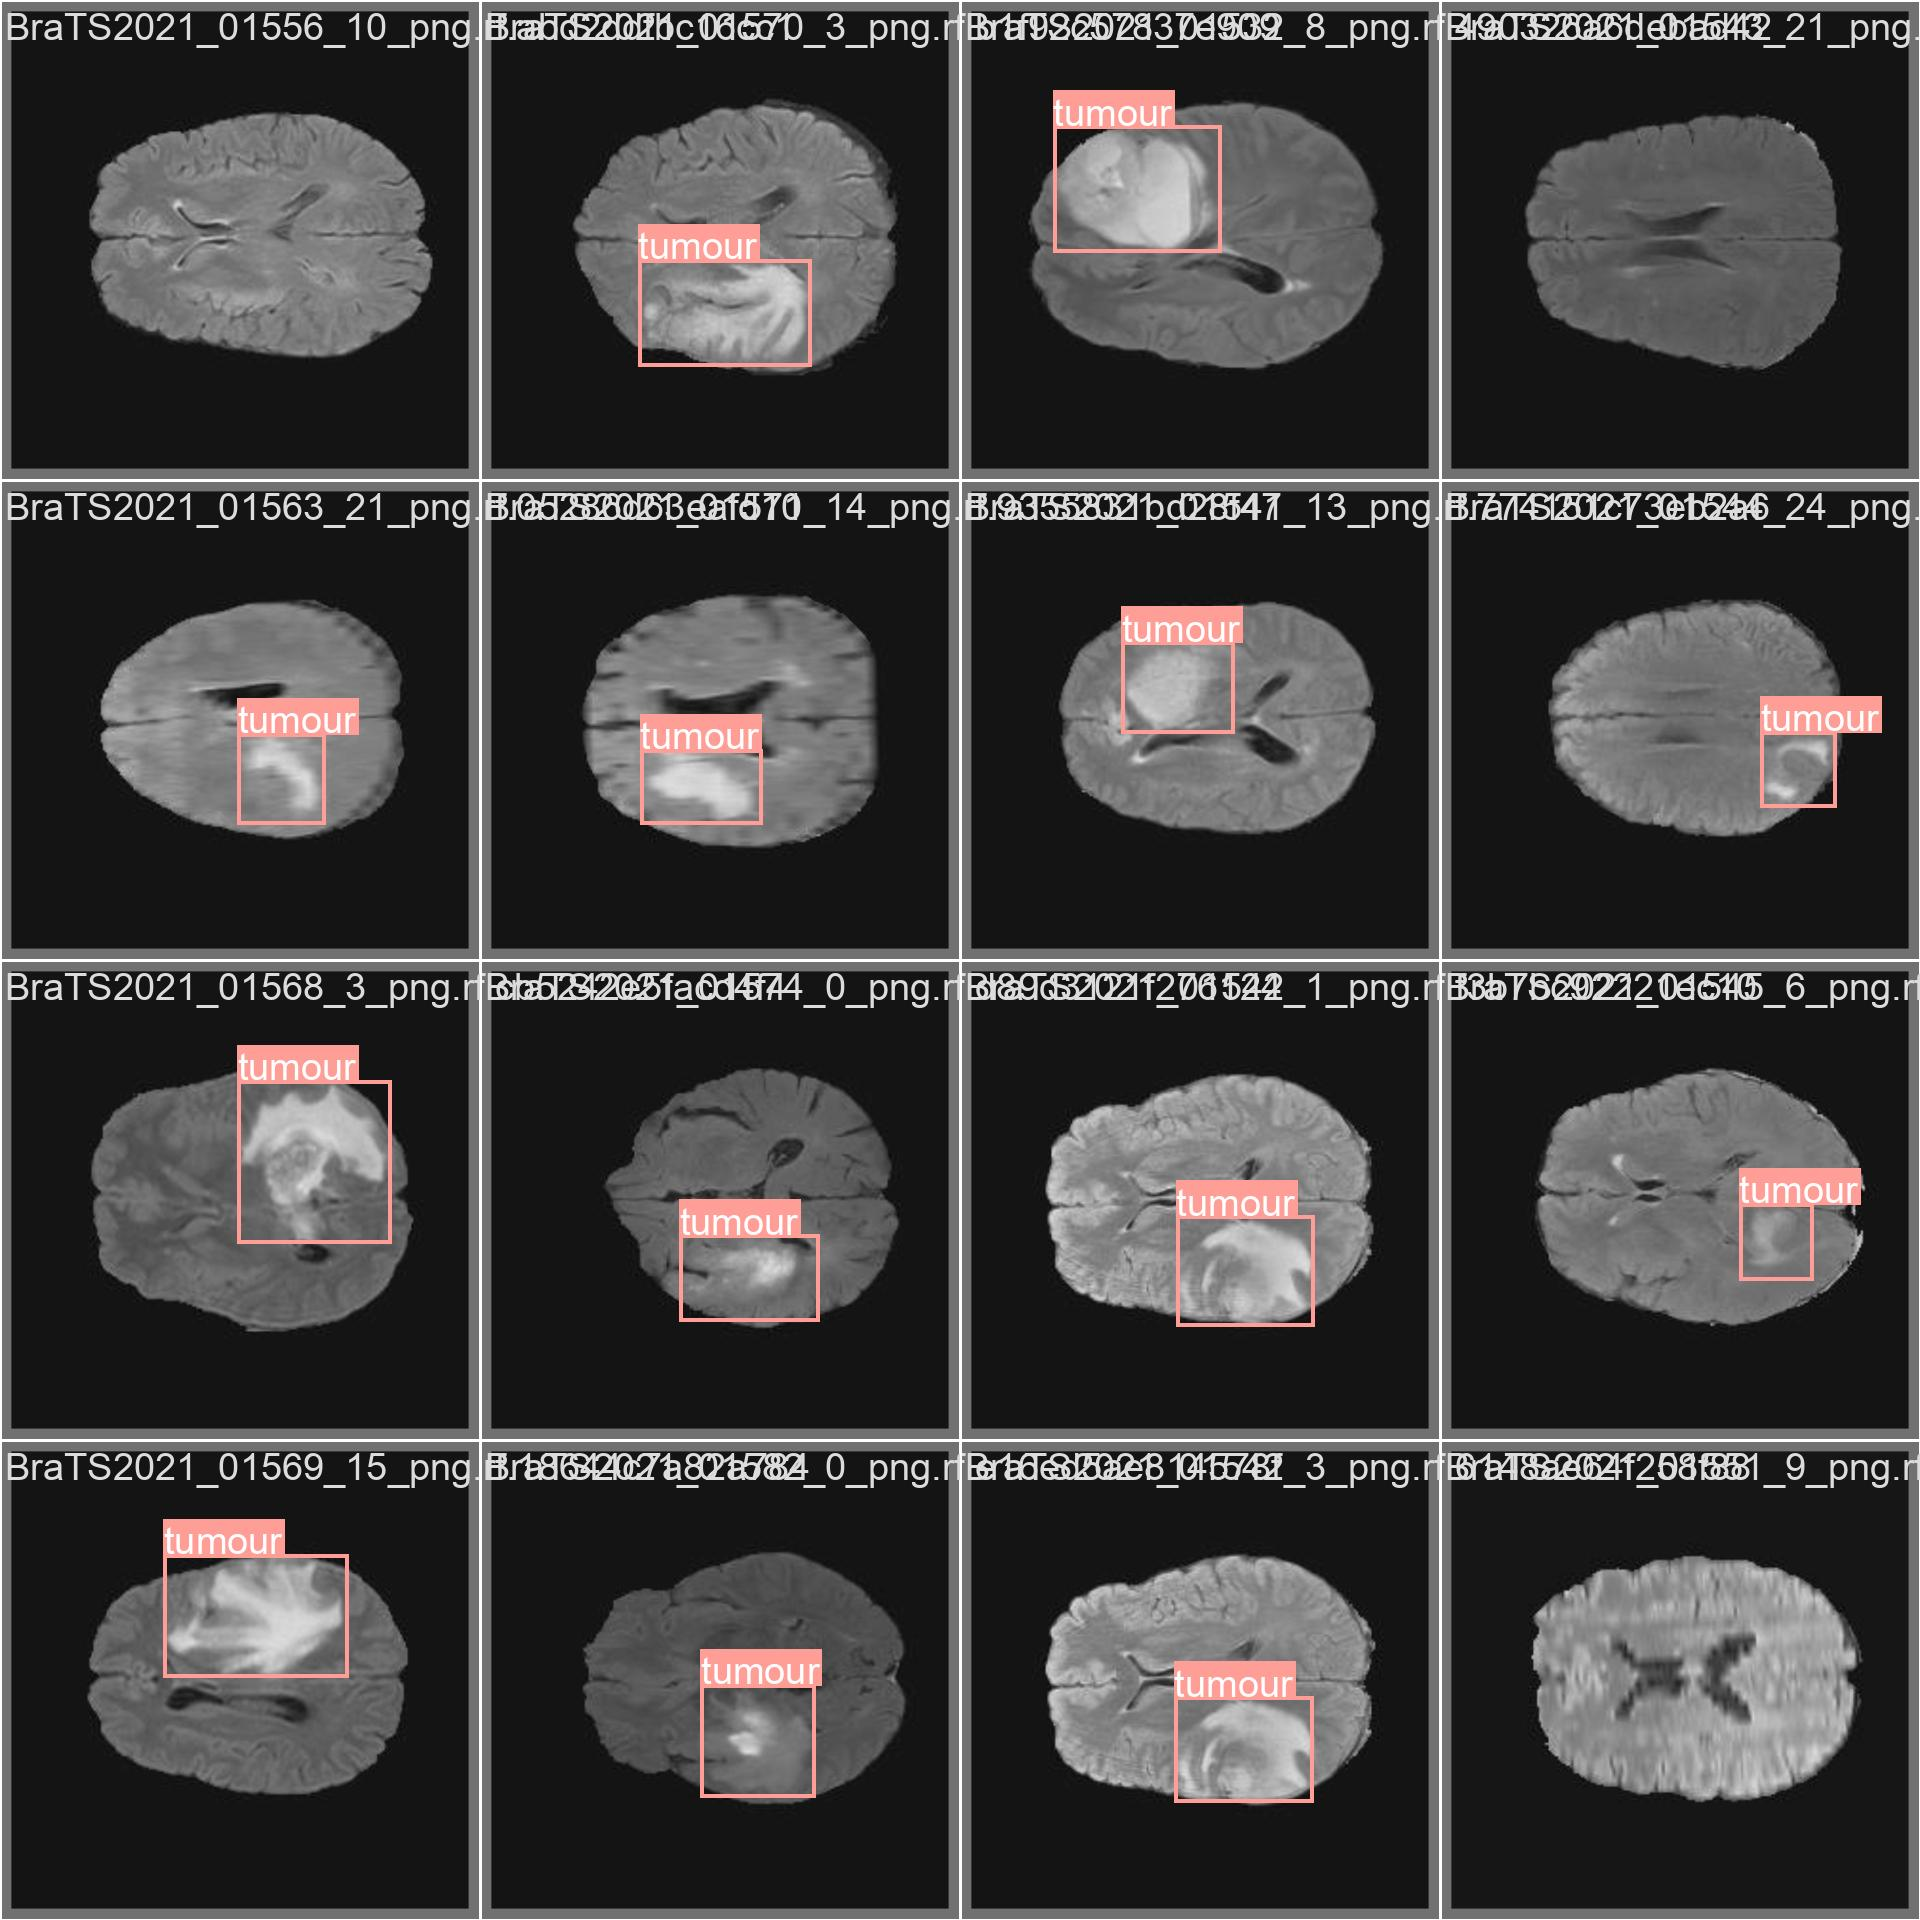

In [21]:
#similary we can check any validation prediction image
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_labels.jpg',
      width=600)

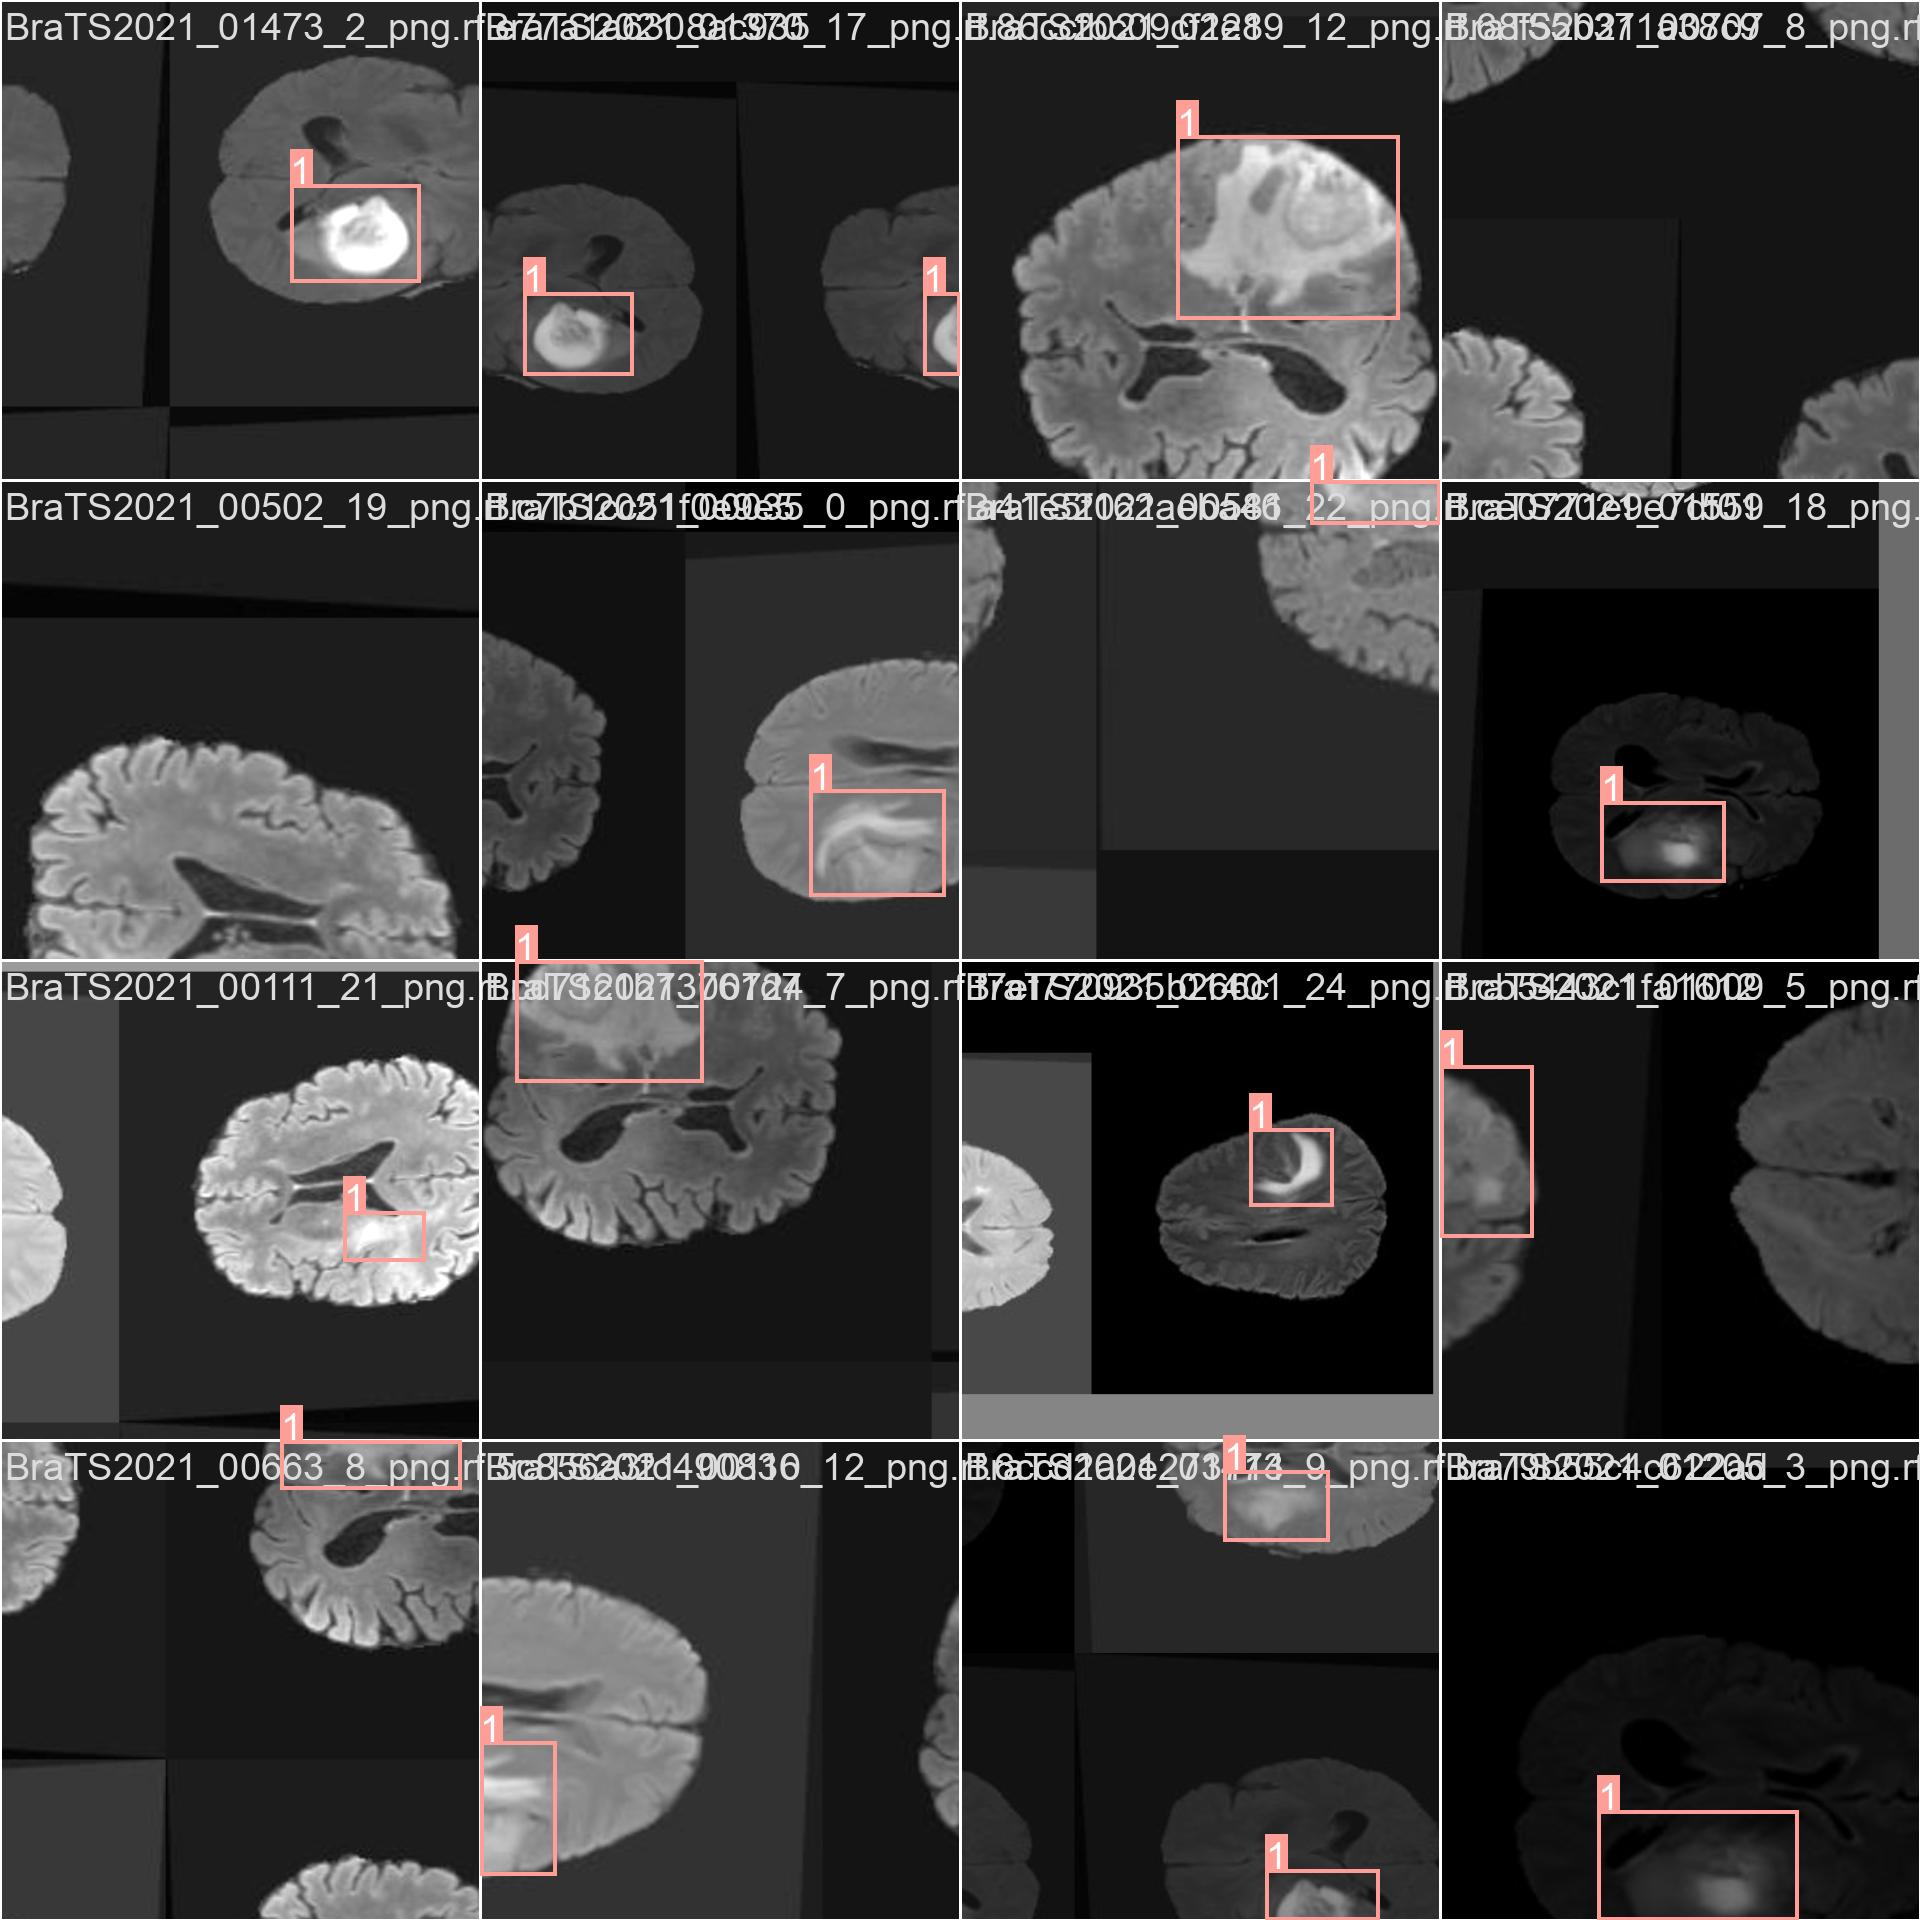

In [23]:
Image(filename=f'{HOME}/runs/detect/train2/train_batch1.jpg',
      width=600)

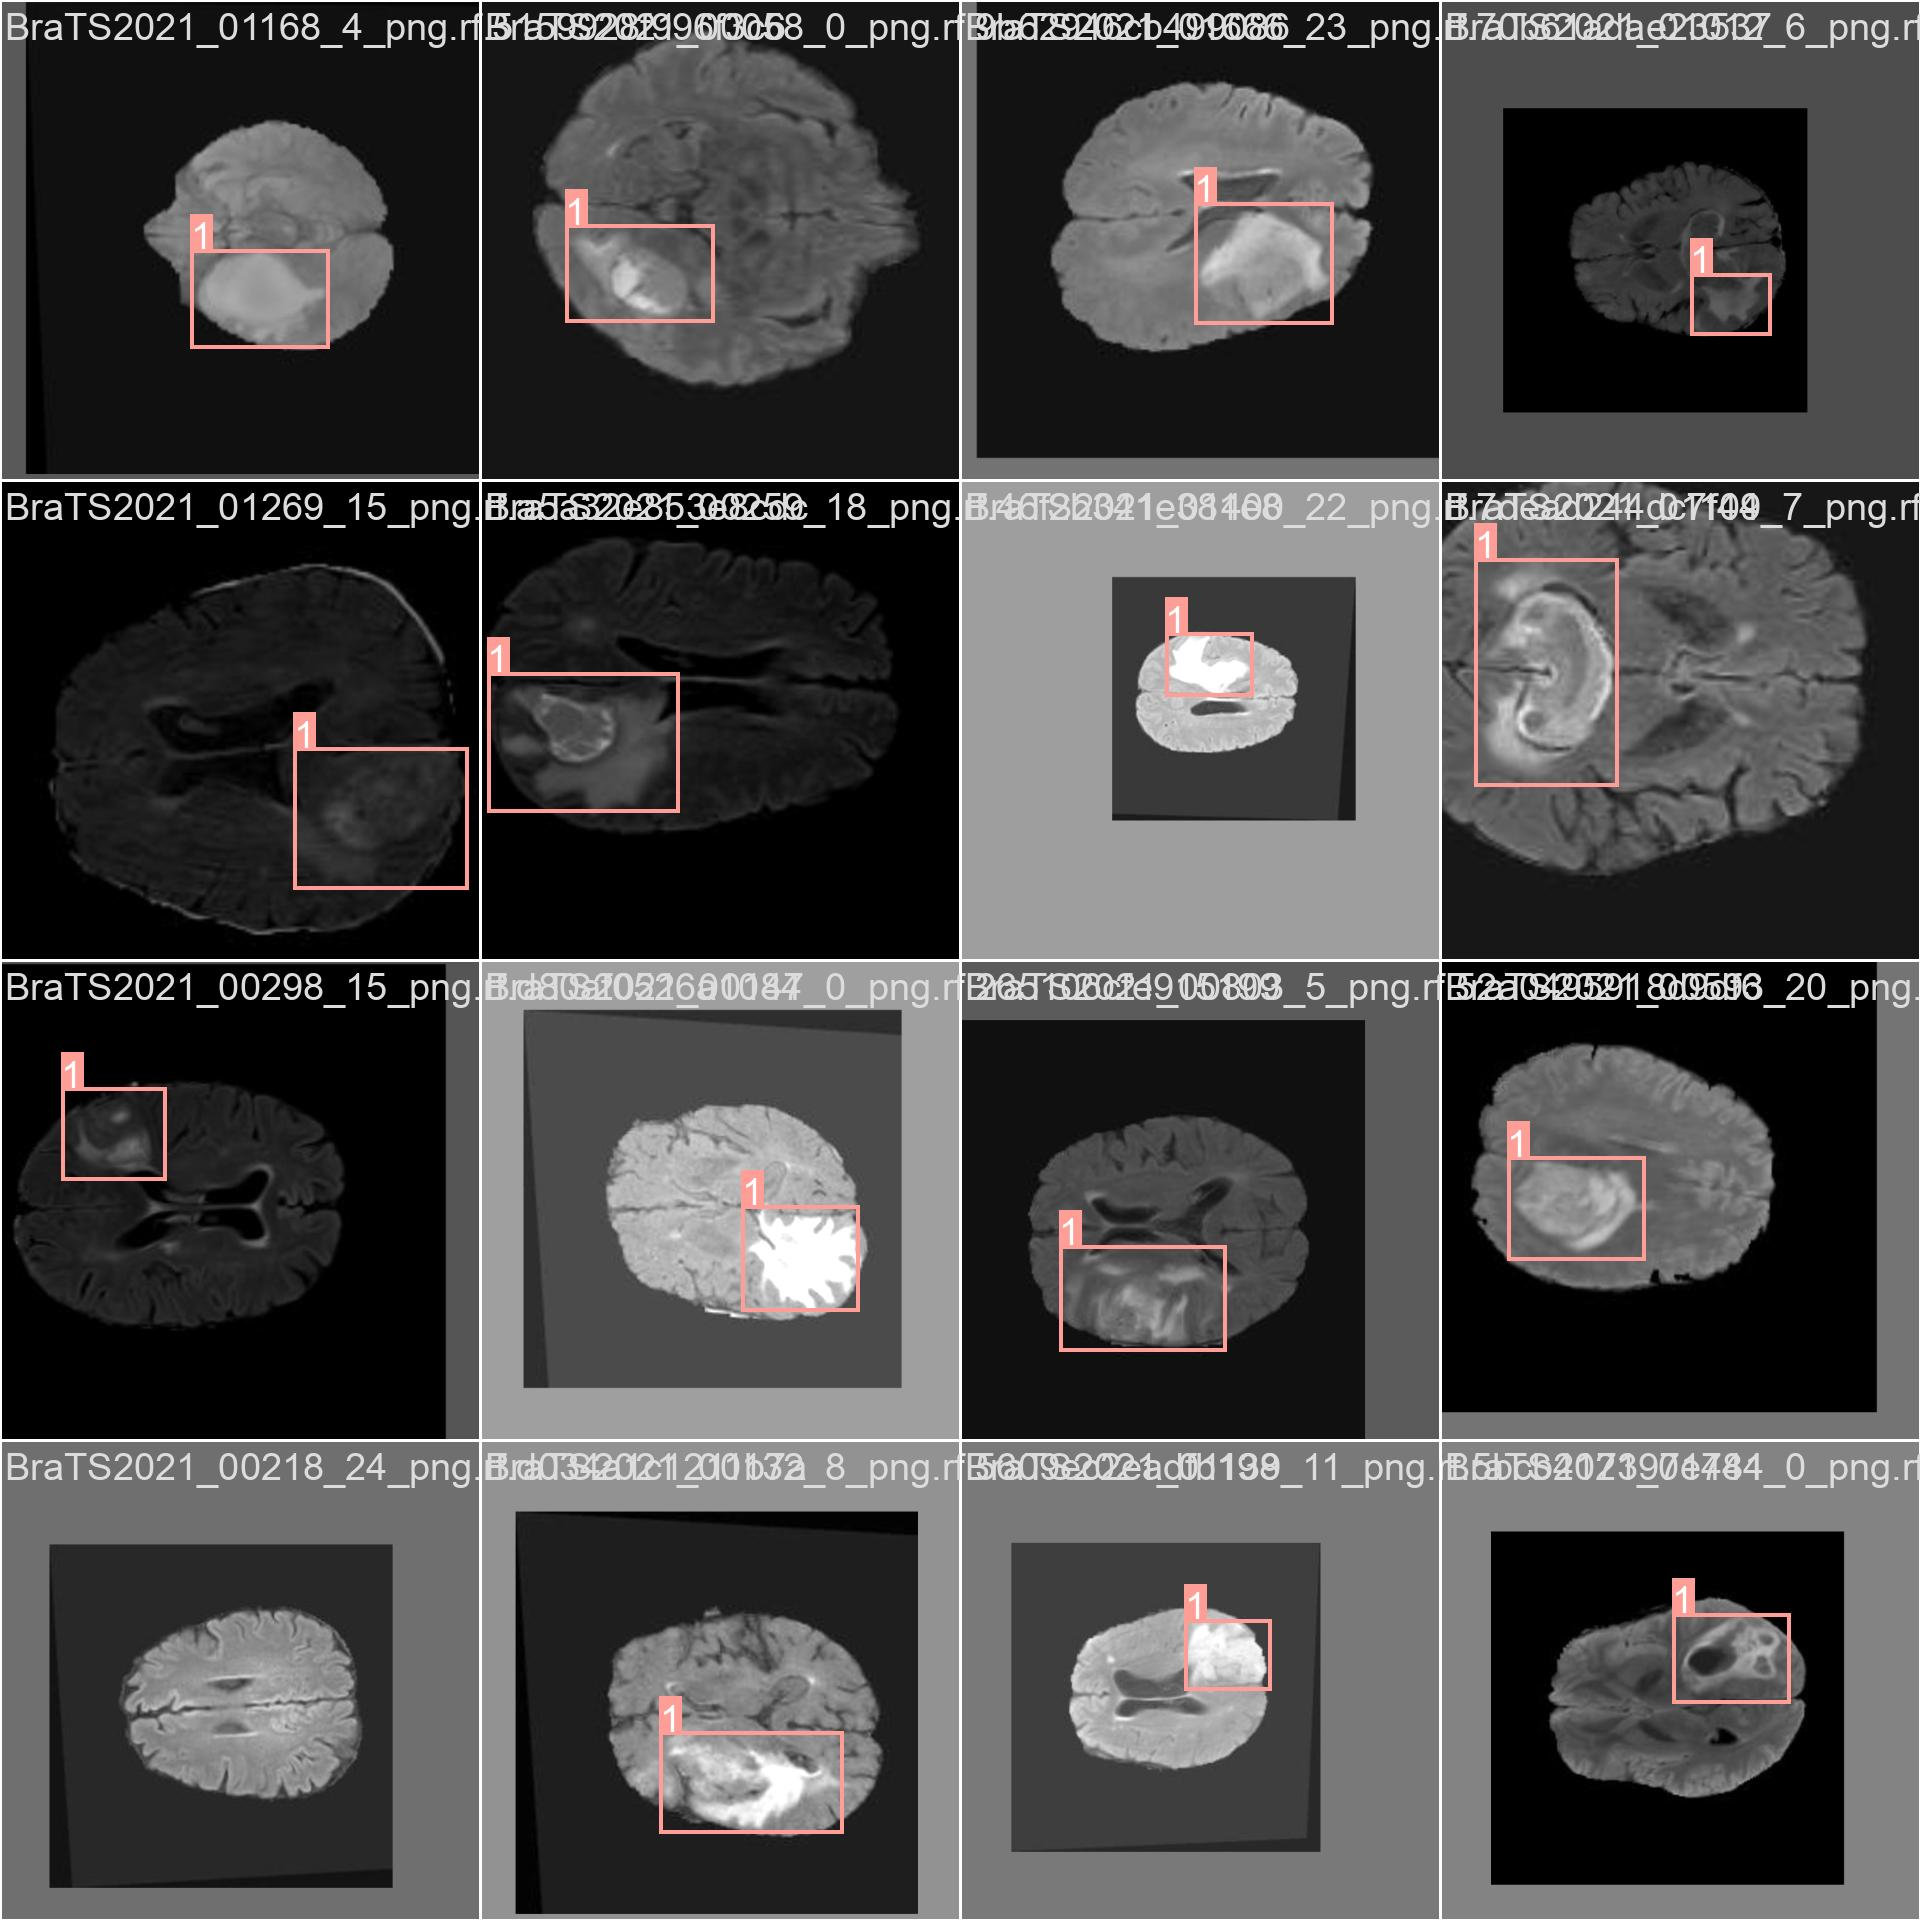

In [24]:
Image(filename=f'{HOME}/runs/detect/train2/train_batch11280.jpg',
      width=600)

In [25]:
#Here we are picking best model from the weights to validate
! yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608150 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /kaggle/working/Brain_Tumour-3/valid/labels.cache... 414 images, 7
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        414        345      0.952      0.429      0.543      0.401
                     -        414          7          1          0      0.169      0.145
                tumour        414        338      0.903      0.858      0.917      0.657
Speed: 0.8ms preprocess, 32.4ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [26]:
#Now we will check for the prediction
! yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.5 source = {dataset.location}/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608150 parameters, 0 gradients, 164.8 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/141 /kaggle/working/Brain_Tumour-3/test/images/BraTS2021_00018_9_png.rf.e6461aa4ccfc220b0732730599b89bb8.jpg: 640x640 1 tumour, 62.8ms
image 2/141 /kaggle/working/Brain_Tumour-3/test/images/BraTS2021_00021_19_png.rf.4048dd190cf19a3122d216733350e30d.jpg: 640x640 (no detections), 47.2ms
image 3/141 /kaggle/working/Brain_Tumour-3/test/images/BraTS2021_00032_18_png.rf.12f2786a759b476bef8429e4e1458ecb.jpg: 640x640 1 tumour, 47.1ms
image 4/141 /kaggle/working/Brain_Tumour-3/test/images/BraTS2021_00032_5_png.rf.e9033c0700d5f182960df41e3942a1a3.jpg: 640x640 1 tumour, 40.1ms
image 5/141 /kaggle/working/Brain_Tumour-3/test/images/BraTS2021_00045_23_png.rf.f78a07d59c9025be9c6f2eb91dce5ada.jpg: 640x640 (no detections), 38.0ms
image 6/141 /kaggle/working/Brain_Tumour-3/test/images/BraTS2

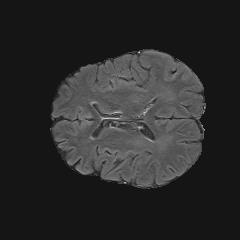

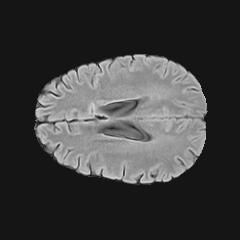

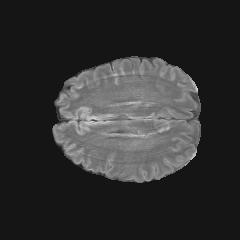

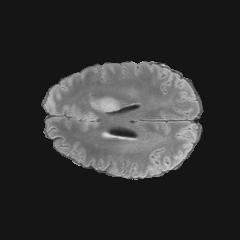

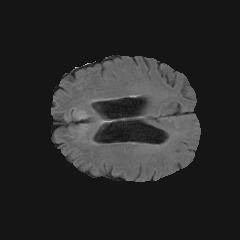

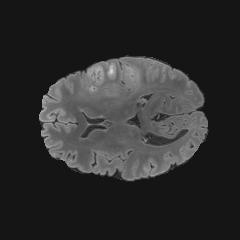

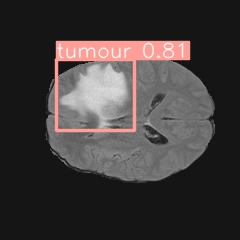

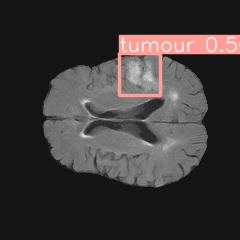

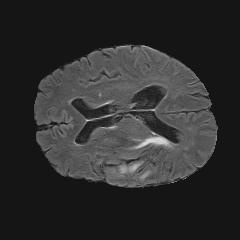

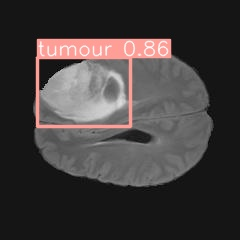

In [28]:
#we will use glob module to check the path names
import glob
from IPython.display import display,Image
for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [29]:
dataset.version

'3'

In [31]:
#finally we can deploy it
project.version(dataset.version).deploy(model_type='yolov8',
                                        model_path=f"{HOME}/runs/detect/train2")

View the status of your deployment at: https://app.roboflow.com/testing-ntfyz/brain_tumour-sfzuc/3
Share your model with the world at: https://universe.roboflow.com/testing-ntfyz/brain_tumour-sfzuc/model/3


In [32]:
#Run inferences on RoboFlow model
model = project.version(dataset.version).model
print('model\n',model)

model
 {
  "id": "brain_tumour-sfzuc/3",
  "name": "Brain_Tumour",
  "version": "3",
  "classes": null,
  "overlap": 30,
  "confidence": 40,
  "stroke": 1,
  "labels": false,
  "format": "json",
  "base_url": "https://detect.roboflow.com/"
}


In [33]:
#we will check the images
import os,random
test_set_loc = dataset.location + "/test/images/"
#we are asking to pick random images from test folder
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

running inference on BraTS2021_01404_12_png.rf.c4c9c4ea8e53548a61475bfef9dd7816.jpg
